In [2]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()

print(df.shape)

(1000, 10)


In [3]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

movie_count=len(df)
movie_rate=df["Rate"].mean()
the_best=df["Rate"].max()
the_worst=df["Rate"].min()

print(f"영화 개수는 {movie_count}개다")
print(f"점수들 평균은 {movie_rate}이다")
print(f"제일 높은 점수는 {the_best}이다")
print(f"제일 높은 점수는 {the_worst}이다")




영화 개수는 1000개다
점수들 평균은 8.0975이다
제일 높은 점수는 9.3이다
제일 높은 점수는 8.0이다


In [4]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

best_movie=df.loc[df["Rate"].idxmax()]

print(f"1등: {best_movie['Title']} - {best_movie['Rate']}점")


1등: 1. The Shawshank Redemption (1994) - 9.3점


In [5]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

# 장르 분리 후 펼치기
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")  # 평점을 숫자로 변환
genres_expanded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")

# 공백 제거
genres_expanded["Genre"] = genres_expanded["Genre"].str.strip()

# 장르별 영화 개수와 평균 평점
genre_stats = genres_expanded.groupby("Genre")["Rate"].agg(["count", "mean"]).sort_values("count", ascending=False)

print(genre_stats)





           count      mean
Genre                     
Drama        728  8.101374
Adventure    211  8.093365
Comedy       208  8.075000
Action       207  8.089372
Crime        176  8.119318
Thriller     165  8.072727
Romance      147  8.077551
Biography    129  8.066667
Mystery      103  8.109709
Animation    100  8.059000
History       66  8.093939
Sci-Fi        63  8.109524
Fantasy       53  8.113208
War           37  8.205405
Family        30  8.160000
Music         28  8.082143
Film-Noir     17  8.129412
Horror        13  8.192308
Musical       12  8.091667
Sport          8  8.175000
Western        7  8.357143


In [6]:
import numpy as np
import pandas as pd 

# css 파일 읽기
df = pd.read_excel("IMDB top 1000.xlsx")

# numpy 로 변환
data_array = df.to_numpy()
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

import re

# Title에서 연도만 추출 (정규표현식)
df["Year"] = df["Title"].str.extract(r"\((\d{4})\)")

# 숫자로 변환
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")


# 연도별 영화 개수와 평균 평점
year_stats = df.groupby("Year")["Rate"].agg(["count","mean"]).sort_index()


print(year_stats)


      count      mean
Year                 
1920      7  8.100000
1921      1  8.300000
1924      1  8.200000
1925      1  8.200000
1926      7  8.100000
...     ...       ...
2016     42  8.030952
2017     18  8.066667
2018     28  8.078571
2019     25  8.124000
2020      1  8.700000

[87 rows x 2 columns]


In [7]:
# 1) Info에서 votes 숫자만 추출 → 새 컬럼 'Votes'
df["Votes"] = (
    df["Info"]
      .astype(str)
      .str.replace(",", "", regex=False)   # 1,234,567 → 1234567
      .str.extract(r"(\d+)")               # 숫자만 뽑기
      .astype(float)                       # 숫자형으로
)

# 2) 결측치 제거(혹시 votes 없는 행)
df_votes = df.dropna(subset=["Votes"])

# 3) 투표 수 기준 내림차순 정렬 후 상위 100개
top100_votes = df_votes.sort_values("Votes", ascending=False).head(10)

# 4) 원하는 컬럼만 보기 (제목 + 투표수 + 평점 등)
print(top100_votes[["Title", "Votes", "Rate"]])


                                                Title      Votes  Rate
0                  1. The Shawshank Redemption (1994)  2295987.0   9.3
2                           3. The Dark Knight (2008)  2260649.0   9.0
8                                 9. Inception (2010)  2022655.0   8.8
9                               10. Fight Club (1999)  1820268.0   8.8
5                              6. Pulp Fiction (1994)  1792919.0   8.9
11                            12. Forrest Gump (1994)  1769309.0   8.8
15                              16. The Matrix (1999)  1643911.0   8.7
10  11. The Lord of the Rings: The Fellowship of t...  1630106.0   8.8
4   5. The Lord of the Rings: The Return of the Ki...  1614369.0   8.9
1                             2. The Godfather (1972)  1584782.0   9.2


1920년대 Top3 장르
 1등: Comedy (17편)
 2등: Drama (17편)
 3등: Romance (15편)

1930년대 Top3 장르
 1등: Drama (23편)
 2등: Comedy (16편)
 3등: Romance (15편)

1940년대 Top3 장르
 1등: Drama (35편)
 2등: Romance (22편)
 3등: Mystery (15편)

1950년대 Top3 장르
 1등: Drama (60편)
 2등: Thriller (19편)
 3등: Adventure (18편)

1960년대 Top3 장르
 1등: Drama (19편)
 2등: Crime (5편)
 3등: Mystery (4편)

1970년대 Top3 장르
 1등: Drama (19편)
 2등: Crime (6편)
 3등: Comedy (5편)

1980년대 Top3 장르
 1등: Drama (19편)
 2등: Adventure (11편)
 3등: Action (8편)

1990년대 Top3 장르
 1등: Drama (101편)
 2등: Crime (46편)
 3등: Animation (39편)

2000년대 Top3 장르
 1등: Drama (208편)
 2등: Action (70편)
 3등: Adventure (69편)

2010년대 Top3 장르
 1등: Drama (226편)
 2등: Action (81편)
 3등: Adventure (79편)

2020년대 Top3 장르
 1등: Biography (1편)
 2등: Drama (1편)
 3등: History (1편)



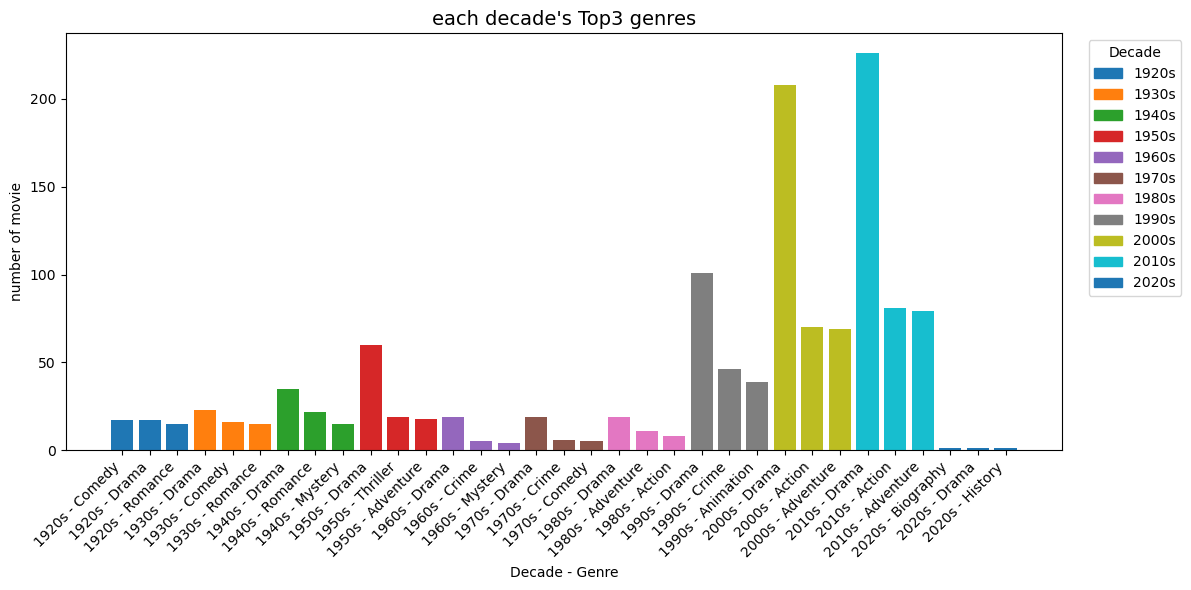

In [8]:

# 1. 연도를 10년 단위로 묶기
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Decade"] = (df["Year"] // 10) * 10   # 1994 → 1990, 2015 → 2010

# 2. 장르 분리해서 펼치기
genres_expanded = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")
genres_expanded["Genre"] = genres_expanded["Genre"].str.strip()

# 3. 10년 단위 + 장르별 영화 개수 세기
decade_genre_counts = (
    genres_expanded.groupby(["Decade", "Genre"])
    .size()
    .reset_index(name="Count")
)

# 4. 각 10년대별 TOP3 뽑기
top3_per_decade = (
    decade_genre_counts.sort_values(["Decade", "Count"], ascending=[True, False])
    .groupby("Decade")
    .head(3)
)

# 5. 보기 좋게 출력
for decade in sorted(top3_per_decade["Decade"].unique()):
    subset = top3_per_decade[top3_per_decade["Decade"] == decade]
    print(f"{decade}년대 Top3 장르")
    for i, row in enumerate(subset.itertuples(), 1):
        print(f" {i}등: {row.Genre} ({row.Count}편)")
    print()

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 보기 좋게 정렬
top3_plot = top3_per_decade.sort_values(["Decade", "Count"], ascending=[True, False])

# 라벨: "1990s - Drama"
labels = top3_plot["Decade"].astype(int).astype(str) + "s - " + top3_plot["Genre"]

# Decade별 색상 매핑
decades = top3_plot["Decade"].unique()
color_map = {dec: cm.tab10(i % 10) for i, dec in enumerate(decades)}
colors = top3_plot["Decade"].map(color_map)

plt.figure(figsize=(12,6))
plt.bar(labels, top3_plot["Count"], color=colors)

# 그래프 꾸미기
plt.xticks(rotation=45, ha="right")
plt.title("each decade's Top3 genres", fontsize=14)
plt.xlabel("Decade - Genre")
plt.ylabel("number of movie")

# 범례: decade별
handles = [plt.Rectangle((0,0),1,1, color=color_map[d]) for d in decades]
plt.legend(handles, [f"{int(d)}s" for d in decades], title="Decade", bbox_to_anchor=(1.02,1), loc="upper left")

plt.tight_layout()
plt.show()



In [9]:
# 🔹 1920년대 영화 중 Drama 장르만 필터링

# 1. 연도 컬럼이 없는 경우 대비
if "Year" not in df.columns:
    df["Year"] = (
        df["Title"].astype(str)
        .str.extract(r"\((\d{4})\)", expand=False)
        .astype(float)
    )

# 2. 1920년대만 필터링
df_1920s = df[(df["Year"] >= 1920) & (df["Year"] < 1930)]


# 3. 장르에 'Drama' 포함된 영화만 (대소문자 무시)
df_1920s_drama = df_1920s[df_1920s["Genre"].str.contains("Drama", case=False, na=False)]

df_1920s_drama = df_1920s_drama[df_1920s_drama["Rate"] >= 8.2]

# 4. 제목 정리 (번호/괄호 제거)
df_1920s_drama["Title_clean"] = (
    df_1920s_drama["Title"]
    .astype(str)
    .str.replace(r"^\s*\d+\.\s*", "", regex=True)
    .str.replace(r"\s*\(\d{4}\)\s*$", "", regex=True)
    .str.strip()
)

# 5. 필요한 컬럼만 보기 좋게 정리
drama_1920s = df_1920s_drama[["Title_clean", "Year", "Genre", "Rate"]].reset_index(drop=True)

# 6. 확인용 출력
display(drama_1920s.head(20))  # 상위 20편만 미리보기

# 7. CSV로 저장 (선택)
drama_1920s.to_csv("IMDB_1920s_Drama.csv", index=False, encoding="utf-8-sig")
print("✅ Drama 장르 포함 1920년대 영화 목록 저장 완료: IMDB_1920s_Drama.csv")


,Title_clean,Year,Genre,Rate
0,Metropolis,1927,"Drama, Sci-Fi",8.3
1,The Kid,1921,"Comedy, Drama, Family",8.3
2,The Gold Rush,1925,"Adventure, Comedy, Drama",8.2


✅ Drama 장르 포함 1920년대 영화 목록 저장 완료: IMDB_1920s_Drama.csv


In [10]:
# 🔹 1930년대 영화 중 Drama 장르만 필터링

# 1. 1930년대만 필터링
df_1930s = df[(df["Year"] >= 1930) & (df["Year"] < 1940)]

# 2. 장르에 'Drama' 포함된 영화만 추출
df_1930s_drama = df_1930s[df_1930s["Genre"].str.contains("Drama", case=False, na=False)]

df_1930s_drama = df_1930s_drama[df_1930s_drama["Rate"] >= 8.5]

# 3. 제목 정리 (번호/괄호 제거)
df_1930s_drama["Title_clean"] = (
    df_1930s_drama["Title"]
    .astype(str)
    .str.replace(r"^\s*\d+\.\s*", "", regex=True)
    .str.replace(r"\s*\(\d{4}\)\s*$", "", regex=True)
    .str.strip()
)

# 4. 필요한 컬럼만 보기 좋게 정리
drama_1930s = df_1930s_drama[["Title_clean", "Year", "Genre", "Rate"]].reset_index(drop=True)

# 5. 미리보기
display(drama_1930s.head(20))

# 6. CSV로 저장 (선택)
drama_1930s.to_csv("IMDB_1930s_Drama.csv", index=False, encoding="utf-8-sig")
print("✅ Drama 장르 포함 1930년대 영화 목록 저장 완료: IMDB_1930s_Drama.csv")


,Title_clean,Year,Genre,Rate
0,Modern Times,1936,"Comedy, Drama, Family",8.5
1,City Lights,1931,"Comedy, Drama, Romance",8.5


✅ Drama 장르 포함 1930년대 영화 목록 저장 완료: IMDB_1930s_Drama.csv


In [11]:
# 🔹 1940년대 영화 중 Drama 장르만 (Gross 컬럼 제외)

# 1) 1940년대만 필터링
df_1940s = df[(df["Year"] >= 1940) & (df["Year"] < 1950)].copy()

# 2) 장르에 'Drama' 포함 (대소문자 무시)
df_1940s_drama = df_1940s[df_1940s["Genre"].str.contains("Drama", case=False, na=False)].copy()

# 3) 8.5점 이상만 필터링
df_1940s_drama = df_1940s_drama[df_1940s_drama["Rate"] >= 8.5]

# 4) 제목 정리 (번호/괄호 제거)
df_1940s_drama["Title_clean"] = (
    df_1940s_drama["Title"]
    .astype(str)
    .str.replace(r"^\s*\d+\.\s*", "", regex=True)
    .str.replace(r"\s*\(\d{4}\)\s*$", "", regex=True)
    .str.strip()
)

# 5) 필요한 컬럼만 (Gross 제외)
drama_1940s = df_1940s_drama[["Title_clean", "Year", "Genre", "Rate"]].reset_index(drop=True)

# 6) 미리보기 & 저장
display(drama_1940s.head(20))
drama_1940s.to_csv("IMDB_1940s_Drama_8.5plus.csv", index=False, encoding="utf-8-sig")
print("✅ 1940년대 Drama (8.5점 이상) 영화 목록 저장 완료: IMDB_1940s_Drama_8.5plus.csv")


,Title_clean,Year,Genre,Rate
0,It's a Wonderful Life,1946,"Drama, Family, Fantasy",8.6
1,Casablanca,1942,"Drama, Romance, War",8.5


✅ 1940년대 Drama (8.5점 이상) 영화 목록 저장 완료: IMDB_1940s_Drama_8.5plus.csv


In [24]:
# decade별 범위 설정
decades = range(1920, 2030, 10)  # 1950, 1960, ..., 2010

for decade in decades:
    start = decade
    end = decade + 10

    # 1️⃣ 해당 10년대 영화 필터링
    df_decade = df[(df["Year"] >= start) & (df["Year"] < end)].copy()

    # 2️⃣ 장르에 'Drama' 포함된 영화만
    df_decade_drama = df_decade[df_decade["Genre"].str.contains("Drama", case=False, na=False)].copy()
    

    # 3️⃣ 8.5점 이상만 추가 필터링
    df_decade_drama = df_decade_drama[df_decade_drama["Rate"] >= 8.3]

    # 4️⃣ 제목 정리
    df_decade_drama["Title_clean"] = (
        df_decade_drama["Title"]
        .astype(str)
        .str.replace(r"^\s*\d+\.\s*", "", regex=True)
        .str.replace(r"\s*\(\d{4}\)\s*$", "", regex=True)
        .str.strip()
    )
   

    # 5️⃣ 필요한 컬럼만 (Gross 제거)
    result = df_decade_drama[["Title_clean", "Year", "Genre", "Rate"]].reset_index(drop=True)

    # 6️⃣ 출력 & 저장
    display(result.head(10))
    filename = f"IMDB_{decade}s_Drama_8.5plus.csv"
    result.to_csv(filename, index=False, encoding="utf-8-sig")
    print(f"✅ {decade}년대 Drama (8.3점 이상) 영화 {len(result)}편 저장 완료 → {filename}")


,Title_clean,Year,Genre,Rate
0,Metropolis,1927,"Drama, Sci-Fi",8.3
1,The Kid,1921,"Comedy, Drama, Family",8.3


✅ 1920년대 Drama (8.3점 이상) 영화 2편 저장 완료 → IMDB_1920s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,Modern Times,1936,"Comedy, Drama, Family",8.5
1,City Lights,1931,"Comedy, Drama, Romance",8.5


✅ 1930년대 Drama (8.3점 이상) 영화 2편 저장 완료 → IMDB_1930s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,It's a Wonderful Life,1946,"Drama, Family, Fantasy",8.6
1,Casablanca,1942,"Drama, Romance, War",8.5
2,The Great Dictator,1940,"Comedy, Drama, War",8.4
3,Bicycle Thieves,1948,Drama,8.3
4,Double Indemnity,1944,"Crime, Drama, Film-Noir",8.3
5,Citizen Kane,1941,"Drama, Mystery",8.3


✅ 1940년대 Drama (8.3점 이상) 영화 6편 저장 완료 → IMDB_1940s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,12 Angry Men,1957,"Crime, Drama",8.9
1,Seven Samurai,1954,"Action, Adventure, Drama",8.6
2,Witness for the Prosecution,1957,"Crime, Drama, Mystery",8.4
3,Paths of Glory,1957,"Drama, War",8.4
4,Sunset Blvd.,1950,"Drama, Film-Noir",8.4
5,Ikiru,1952,Drama,8.3


✅ 1950년대 Drama (8.3점 이상) 영화 6편 저장 완료 → IMDB_1950s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,Harakiri,1962,"Action, Drama, Mystery",8.6
1,High and Low,1963,"Crime, Drama, Mystery",8.4
2,Lawrence of Arabia,1962,"Adventure, Biography, Drama",8.3
3,The Apartment,1960,"Comedy, Drama, Romance",8.3


✅ 1960년대 Drama (8.3점 이상) 영화 4편 저장 완료 → IMDB_1960s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,The Godfather,1972,"Crime, Drama",9.2
1,The Godfather: Part II,1974,"Crime, Drama",9.0
2,One Flew Over the Cuckoo's Nest,1975,Drama,8.7
3,Anand,1971,"Drama, Musical",8.5
4,Apocalypse Now,1979,"Drama, Mystery, War",8.4
5,Taxi Driver,1976,"Crime, Drama",8.3
6,The Sting,1973,"Comedy, Crime, Drama",8.3
7,A Clockwork Orange,1971,"Crime, Drama, Sci-Fi",8.3


✅ 1970년대 Drama (8.3점 이상) 영화 8편 저장 완료 → IMDB_1970s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,Cinema Paradiso,1988,Drama,8.5
1,Grave of the Fireflies,1988,"Animation, Drama, War",8.5
2,Once Upon a Time in America,1984,"Crime, Drama",8.4
3,The Shining,1980,"Drama, Horror",8.4
4,Full Metal Jacket,1987,"Drama, War",8.3
5,Come and See,1985,"Drama, Thriller, War",8.3
6,Amadeus,1984,"Biography, Drama, History",8.3
7,Scarface,1983,"Crime, Drama",8.3
8,Das Boot,1981,"Adventure, Drama, Thriller",8.3


✅ 1980년대 Drama (8.3점 이상) 영화 9편 저장 완료 → IMDB_1980s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,The Shawshank Redemption,1994,Drama,9.3
1,Pulp Fiction,1994,"Crime, Drama",8.9
2,Schindler's List,1993,"Biography, Drama, History",8.9
3,Fight Club,1999,Drama,8.8
4,Forrest Gump,1994,"Drama, Romance",8.8
5,Goodfellas,1990,"Biography, Crime, Drama",8.7
6,Saving Private Ryan,1998,"Drama, War",8.6
7,The Green Mile,1999,"Crime, Drama, Fantasy",8.6
8,Life Is Beautiful,1997,"Comedy, Drama, Romance",8.6
9,Se7en,1995,"Crime, Drama, Mystery",8.6


✅ 1990년대 Drama (8.3점 이상) 영화 19편 저장 완료 → IMDB_1990s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,The Dark Knight,2008,"Action, Crime, Drama",9.0
1,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",8.9
2,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8
3,The Lord of the Rings: The Two Towers,2002,"Action, Adventure, Drama",8.7
4,City of God,2002,"Crime, Drama",8.6
5,The Prestige,2006,"Drama, Mystery, Sci-Fi",8.5
6,The Departed,2006,"Crime, Drama, Thriller",8.5
7,The Pianist,2002,"Biography, Drama, Music",8.5
8,Gladiator,2000,"Action, Adventure, Drama",8.5
9,3 Idiots,2009,"Comedy, Drama",8.4


✅ 2000년대 Drama (8.3점 이상) 영화 17편 저장 완료 → IMDB_2000s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,Parasite,2019,"Comedy, Drama, Thriller",8.6
1,Interstellar,2014,"Adventure, Drama, Sci-Fi",8.6
2,Joker,2019,"Crime, Drama, Thriller",8.5
3,Whiplash,2014,"Drama, Music",8.5
4,The Intouchables,2011,"Biography, Comedy, Drama",8.5
5,Capernaum,2018,Drama,8.4
6,Ayla: The Daughter of War,2017,"Biography, Drama, History",8.4
7,Your Name.,2016,"Animation, Drama, Fantasy",8.4
8,Dangal,2016,"Action, Biography, Drama",8.4
9,Avengers: Endgame,2019,"Action, Adventure, Drama",8.4


✅ 2010년대 Drama (8.3점 이상) 영화 19편 저장 완료 → IMDB_2010s_Drama_8.5plus.csv


,Title_clean,Year,Genre,Rate
0,Hamilton,2020,"Biography, Drama, History",8.7


✅ 2020년대 Drama (8.3점 이상) 영화 1편 저장 완료 → IMDB_2020s_Drama_8.5plus.csv


In [13]:
# 🔹 2020년대 Biography 장르 영화만 추출

# 1️⃣ 2020~2029년대 영화 필터링
df_2020s = df[(df["Year"] >= 2020) & (df["Year"] < 2030)].copy()

# 2️⃣ 장르에 'Biography' 포함 (대소문자 무시)
df_2020s_bio = df_2020s[df_2020s["Genre"].str.contains("Drama", case=False, na=False)].copy()

# 3️⃣ 제목 정리 (번호 / 괄호 제거)
df_2020s_bio["Title_clean"] = (
    df_2020s_bio["Title"]
    .astype(str)
    .str.replace(r"^\s*\d+\.\s*", "", regex=True)
    .str.replace(r"\s*\(\d{4}\)\s*$", "", regex=True)
    .str.strip()
)

# 4️⃣ 필요한 컬럼만 정리 (Gross 제외)
bio_2020s = df_2020s_bio[["Title_clean", "Year", "Genre", "Rate"]].reset_index(drop=True)

# 5️⃣ 미리보기 & 저장
display(bio_2020s.head(20))
bio_2020s.to_csv("IMDB_2020s_Biography.csv", index=False, encoding="utf-8-sig")
print("✅ 2020년대 Biography 영화 목록 저장 완료: IMDB_2020s_Biography.csv")


,Title_clean,Year,Genre,Rate
0,Hamilton,2020,"Biography, Drama, History",8.7


✅ 2020년대 Biography 영화 목록 저장 완료: IMDB_2020s_Biography.csv
